## 2nd step arrange data to get more accuracy

In [1]:
import pandas as pd
import json

In [2]:
# Read the data from the CSV file
# dt_arr = data_arrange
dt_arr = pd.read_csv('../Data2/CleanedLt.csv')

In [3]:
x = dt_arr['tag']
y = dt_arr['summary']

In [4]:
# dt_lt_arr = data long text arrange
# pre_arr_dt_lt = pre arrange data long text
selected_columns = ['tag', 'summary']  
dt_lt_arr = dt_arr[selected_columns]
dt_lt_arr.to_csv('../Data2/pre_arr_dt_lt.csv', index=False) 

# Command dulu

In [5]:
# multiclass_lt = pd.read_csv('../Data2/pre_arr_dt_lt.csv')

In [6]:
# multiclass_lt = pd.get_dummies(multiclass_lt, columns=['tag'], prefix='', prefix_sep='')

In [7]:
# print(multiclass_lt.columns)

Index(['summary', '1', '2', '3', '4', '5', '6', '7'], dtype='object')


In [8]:
# multiclass_lt = multiclass_lt.groupby('summary').max().reset_index()

In [9]:
# multiclass_lt.to_csv('C:/Users/irfanizam/workspace/FYP-Example/FinalFinalFyp/Data2/ArrangedLt.csv', index=False)  

# Multiclass data to Multilabel data

In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
from nltk.tokenize import word_tokenize
import gensim.downloader
import seaborn as sns
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irfanizam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Step 1: Load your data from CSV
file_path = '../Data2/pre_arr_dt_lt.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

In [3]:
# Step 2: Create MultiLabelBinarizer and fit on the 'relation' column
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df['tag'].apply(lambda x: [x]))

In [4]:
# Step 3: Create a new DataFrame with one-hot encoded labels
df_encoded = pd.concat([df['summary'], pd.DataFrame(labels, columns=mlb.classes_)], axis=1)

In [5]:
# Step 4: Split the data into train and test sets
train_data, test_data = train_test_split(df_encoded, test_size=0.2, random_state=42)

In [6]:
# Save the test set data to a separate CSV file
test_data.to_csv('../Data2/TestLt.csv', index=False)
train_data.to_csv('../Data2/TrainLt.csv', index=False)

In [7]:
# Step 5: Define features and labels for training and testing
X_train = train_data['summary']
y_train = np.argmax(train_data.drop('summary', axis=1).values, axis=1)
X_test = test_data['summary']
y_test = np.argmax(test_data.drop('summary', axis=1).values, axis=1)

In [8]:
# Step 6: Display the transformed data
print("Transformed Training Data:")
print(train_data)

Transformed Training Data:
                                                summary  1  2  3
3769  at june employee engaged grading streets areas...  0  0  1
1407  at approximately october employees constructin...  1  0  0
2775  at approximately may employee working two indi...  0  0  1
3341  at approximately december employee engineer co...  0  0  1
1116  at approximately september employee infinity s...  1  0  0
...                                                 ... .. .. ..
1130  at approximately november employee ascended co...  1  0  0
1294  on january carpenter employed contractor insta...  1  0  0
860   on june employee employee foreman installing s...  1  0  0
3507  on march employee j baucom construction llc as...  0  0  1
3174  on march employee working brickmason stonemaso...  0  0  1

[3160 rows x 4 columns]


In [9]:
# Step 7

X_train = train_data['summary']

# Tokenize the text data
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in X_train]

# Define and train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model
word2vec_model.save("word2vec_model.model")

# Access word vectors
vector = word2vec_model.wv['summary']

# Find similar words
similar_words = word2vec_model.wv.most_similar('summary', topn=5)

# Print the results
print(f"Vector for 'word': {vector}")
print(f"Similar words to 'word': {similar_words}")


Vector for 'word': [-0.01207892 -0.00353746  0.01579037  0.00726243 -0.01261218 -0.02210609
  0.00961154  0.04390904 -0.00920117  0.00033548  0.0047597  -0.04088084
 -0.00906457 -0.00108652 -0.01031216 -0.00110265  0.02027768 -0.02953877
 -0.0051839  -0.01568744 -0.0023678   0.0135553   0.01223216 -0.0179703
  0.00310396  0.00936961 -0.00117925 -0.0135302  -0.01685585 -0.01082717
  0.00497755  0.00298656  0.01589387 -0.00329068 -0.01007725  0.01544585
  0.00821431 -0.03363589 -0.01444576 -0.04004107 -0.00138831 -0.01472429
 -0.00729812 -0.00166082  0.0233537  -0.00296678 -0.02164662  0.01243914
  0.01665961  0.00340487  0.00193239 -0.01952327 -0.01366928  0.00590946
 -0.00301165  0.00122577  0.01554388 -0.00248328 -0.00649616  0.0010217
 -0.00237122  0.0072867  -0.01137984  0.00120965 -0.02035913  0.01364946
  0.00239697  0.01916178 -0.01741877  0.0246278  -0.01011441  0.00920949
  0.02720947 -0.01099061  0.01906612  0.00087896  0.00901861 -0.01723782
 -0.02016836  0.01631499 -0.003711

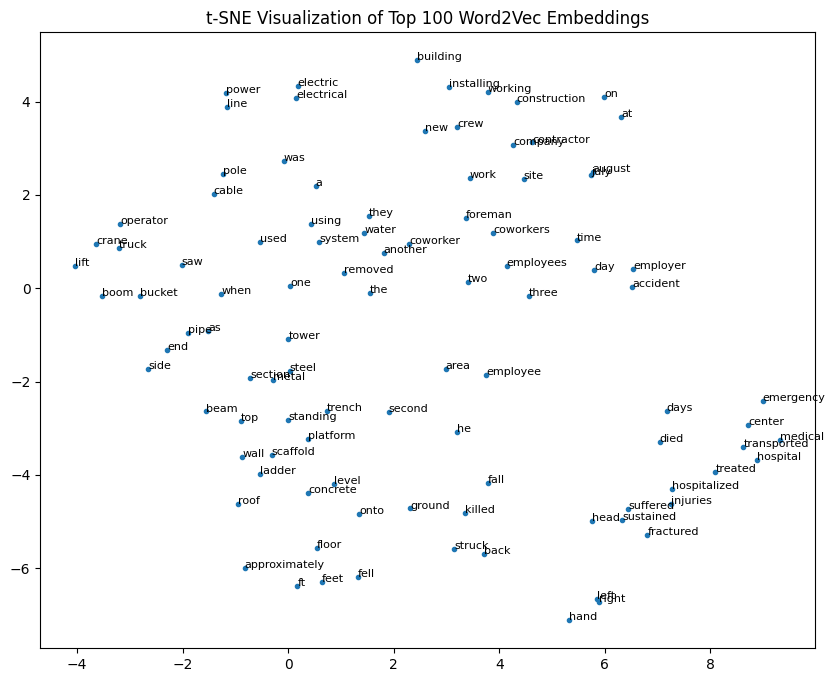

In [10]:
import gensim
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your Word2Vec model
# Replace 'word2vec_model.model' with the actual path to your Word2Vec model file
word2vec_model = gensim.models.Word2Vec.load('word2vec_model.model')

# Get the vocabulary and corresponding vectors
words = list(word2vec_model.wv.key_to_index.keys())
vectors = [word2vec_model.wv[word] for word in words]

# Select the top 100 words and vectors
top_words = 100
words = words[:top_words]
vectors = vectors[:top_words]

# Convert the list of vectors to a 2D numpy array
vectors = np.array(vectors)

# Apply t-SNE to reduce the dimensionality
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], marker='.')

# Annotate the points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=8)

plt.title('t-SNE Visualization of Top 100 Word2Vec Embeddings')
plt.show()


In [11]:
# Function to calculate the average Word2Vec vector for a tweet
def average_word_vectors(words, model):
    feature_vector = np.zeros((model.vector_size,), dtype="float64")
    nwords = 0
    for word in words:
        if word in model.wv.key_to_index:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv.get_vector(word))
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

In [12]:
# Tokenize the tweets
tokenized_tweet = [word_tokenize(tweet.lower()) for tweet in X_train]

In [13]:
# Create a feature matrix for training
train_vectors = [average_word_vectors(tweet, word2vec_model) for tweet in tokenized_tweet]
X_train_word2vec = np.vstack(train_vectors)

In [14]:
# Train SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_word2vec, y_train)

# Step 8: Evaluate the model on the test set
# Tokenize the tweets for the test set
tokenized_test_summary = [word_tokenize(summary.lower()) for summary in X_test]

# Create a feature matrix for testing
test_vectors = [average_word_vectors(summary, word2vec_model) for summary in tokenized_test_summary]
X_test_word2vec = np.vstack(test_vectors)

# Predict the labels for the test set
y_pred_test = svm_model.predict(X_test_word2vec)

# Step 9.1: Accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Round Test Accuracy: {accuracy_test}")

Round Test Accuracy: 0.8088607594936709


In [15]:
# Step 9.2: Classification Report
classification_rep_test = classification_report(y_test, y_pred_test)
print("Test Classification Report:\n", classification_rep_test)

Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       324
           1       0.85      0.76      0.80       186
           2       0.78      0.79      0.78       280

    accuracy                           0.81       790
   macro avg       0.81      0.80      0.81       790
weighted avg       0.81      0.81      0.81       790



In [16]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred_test are your true labels and predicted labels, respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

print("Test F1 Score:", f1_score)


Test F1 Score: 0.8086343654934962


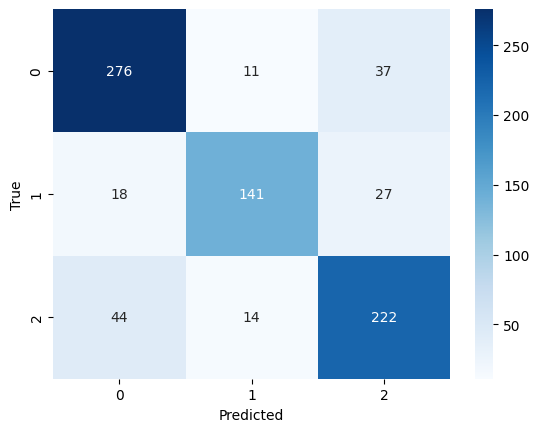

In [17]:
# Step 9.3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

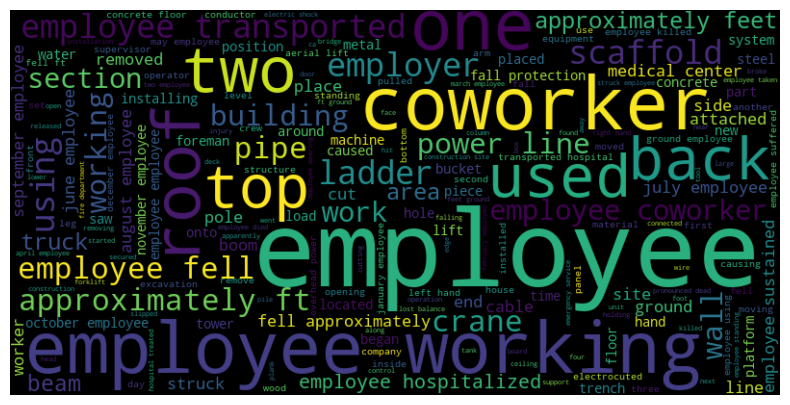

In [16]:
from wordcloud import WordCloud

# Combine all tweets into a single string
all_summary_text = ' '.join(df['summary'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_summary_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

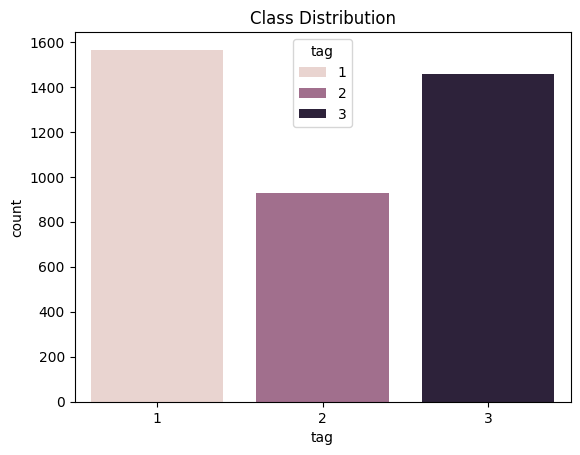

In [17]:
sns.countplot(x='tag', data=df, hue='tag')
plt.title('Class Distribution')
plt.show()

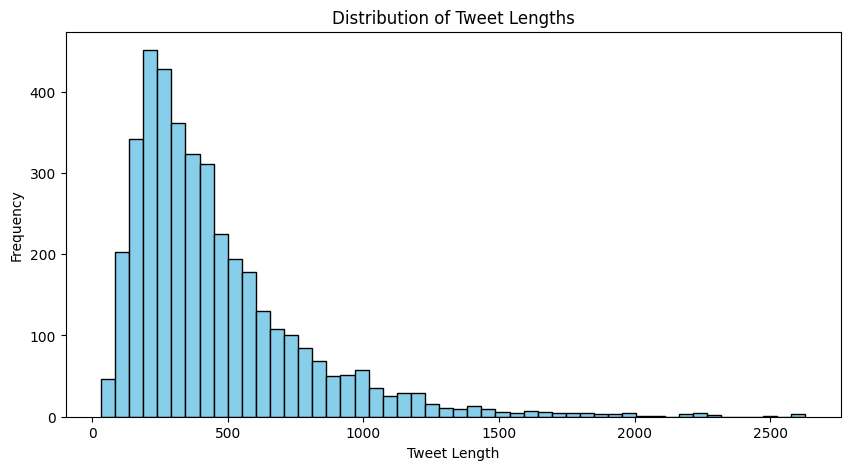

In [18]:
# Calculate tweet lengths
summary_lengths = df['summary'].apply(len)

# Plot a histogram
plt.figure(figsize=(10, 5))
plt.hist(summary_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Step 10: Save the trained model
model_filename = 'lt_svm_model.h5'
with open(model_filename, 'wb') as model_file:
    pickle.dump(svm_model, model_file)

In [20]:
import joblib
# Load the saved word2vec vectorizer
loaded_vectorizer = joblib.load('word2vec_model.model')
# Load the saved SVM classifier
svm_classifier = joblib.load('lt_svm_model.h5')

In [21]:
def class_det(summary, model, classifier):
    tokenized_tweet = [word.lower() for word in summary.split()]
    vectorized_input_data = [average_word_vectors(tokenized_tweet, model)]
    predictions = classifier.predict(vectorized_input_data)
    print(predictions)
    return predictions

In [22]:
queries = [
    'a team dredging employees changing line hoist drum employee pants leg became caught hoist line pulled around hoist drum employee sustained fatal injuries died within next minutes','at approximately december employee mechanic working number boiler house unit second employer the second employer refiner petroleum products employee attempting step open drain sump contained hot substance degrees fahrenheit when attempted step open sump stepped immersed right leg lower thigh employee received burns right leg hospitalized seven days','a power line worker mounting l bracket crossarm utility pole the bracket going hold cutout new transformer as employee tightening two top bolts bracket contacted power line neck he electrocuted','on february employee coworker installing metal decking onto steel beams skylight lobby area towson town center mall this serve containment subsequent asbestos removal employee fell approximately ft steel beams concrete floor he hospitalized university maryland shock trauma center fractured skull fractured nose fractured arms the investigation revealed employee wearing fall protection equipment time accident the coworker returned ground level via scissors lift see caused employee fall'
]


for query in queries:
    print(query, class_det(query, word2vec_model, svm_classifier))
    print()

[1]
a team dredging employees changing line hoist drum employee pants leg became caught hoist line pulled around hoist drum employee sustained fatal injuries died within next minutes [1]

[2]
at approximately december employee mechanic working number boiler house unit second employer the second employer refiner petroleum products employee attempting step open drain sump contained hot substance degrees fahrenheit when attempted step open sump stepped immersed right leg lower thigh employee received burns right leg hospitalized seven days [2]

[1]
a power line worker mounting l bracket crossarm utility pole the bracket going hold cutout new transformer as employee tightening two top bolts bracket contacted power line neck he electrocuted [1]

[0]
on february employee coworker installing metal decking onto steel beams skylight lobby area towson town center mall this serve containment subsequent asbestos removal employee fell approximately ft steel beams concrete floor he hospitalized univ